In [29]:
import pandas as pd

In [30]:
df = pd.read_csv('train.csv')

In [31]:
df.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [32]:
df.shape

(42000, 785)

In [33]:
df.sample()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
35399      2       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
35399       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
35399         0         0         0         0         0  

[1 rows x 785 columns]

In [34]:
import matplotlib.pyplot as plt

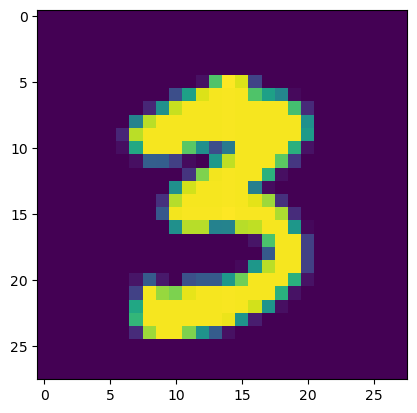

In [35]:
plt.imshow(df.iloc[33231,1:].values.reshape(28,28))

In [36]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [39]:
X_train.shape

(33600, 784)

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
knn = KNeighborsClassifier()

In [42]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [43]:
import time 
start = time.time()
y_pred = knn.predict(X_test)
print(time.time() - start)

12.948151350021362


In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [46]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
# PCA
from sklearn.decomposition import PCA 
pca = PCA(n_components=None)

In [48]:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [49]:
X_train.shape

(33600, 784)

Lets take 100 n_components which 100 columns
recuding from 784 dimensions to 100 dimensions

In [50]:
# PCA
from sklearn.decomposition import PCA 
pca = PCA(n_components=100)

In [51]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [53]:
X_train_trf.shape

(33600, 100)

In [55]:
knn = KNeighborsClassifier()

In [56]:
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [57]:
y_pred = knn.predict(X_test_trf)

In [58]:
accuracy_score(y_test,y_pred)

0.9533333333333334

In [62]:
for i in range(1,785):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)
    
    knn = KNeighborsClassifier()
    knn.fit(X_train_trf,y_train)
    
    y_pred = knn.predict(X_test_trf)
    print(i,accuracy_score(y_test,y_pred))

1 0.2557142857142857
2 0.32416666666666666
3 0.5102380952380953
4 0.6660714285714285
5 0.7378571428571429
6 0.8226190476190476
7 0.8438095238095238
8 0.8720238095238095
9 0.8871428571428571
10 0.9057142857142857
11 0.9113095238095238
12 0.9176190476190477
13 0.9284523809523809
14 0.9335714285714286
15 0.9385714285714286
16 0.9388095238095238
17 0.939047619047619
18 0.9410714285714286
19 0.9425
20 0.944047619047619
21 0.9433333333333334
22 0.945
23 0.945595238095238
24 0.9458333333333333
25 0.9477380952380953
26 0.9472619047619047
27 0.9483333333333334
28 0.9470238095238095
29 0.9486904761904762
30 0.9497619047619048
31 0.9508333333333333
32 0.9507142857142857
33 0.9498809523809524
34 0.9502380952380952
35 0.9511904761904761
36 0.9517857142857142
37 0.9515476190476191
38 0.9538095238095238
39 0.9526190476190476
40 0.9522619047619048
41 0.9530952380952381
42 0.9528571428571428
43 0.9525
44 0.9532142857142857
45 0.9532142857142857
46 0.9530952380952381
47 0.9539285714285715
48 0.952619047

KeyboardInterrupt: 

### Dimensionality reduction for visualization

In [63]:
# transforming to the 2d cordinate system
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [64]:
X_train_trf

array([[-2.71863397, -0.48923749],
       [-0.67698191, -6.75390422],
       [-3.03322562,  6.50961207],
       ...,
       [ 2.14879758,  0.78047727],
       [ 1.05957646,  0.94819111],
       [17.70259281,  1.96170468]])

In [66]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 color=y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10)

fig.show()

In [67]:
# transfoming in 3D
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [68]:
X_train_trf

array([[-2.71864761, -0.48985496,  1.13591616],
       [-0.67701438, -6.75395565, -2.33572116],
       [-3.03319065,  6.51009254,  7.49144553],
       ...,
       [ 2.14881558,  0.78061062, -0.74734148],
       [ 1.05956717,  0.94779802,  3.94997273],
       [17.70257104,  1.96173682, -4.94375954]])

In [69]:
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=X_train_trf[:,0], y=X_train_trf[:,1], z=X_train_trf[:,2],
                    color=y_train_trf)

fig.update_layout(
    margin = dict(l=20, r=20, t=20, b=20)
)
fig.show()

In [70]:
# Eigen values
pca.explained_variance_

array([40.67111198, 29.17023391, 26.74459614])

In [73]:
# Eigen vectors
pca.components_

array([[ 1.00000000e+00, -6.11721513e-10,  1.54109242e-10, ...,
        -1.67830842e-33,  4.65957960e-35,  9.33826018e-35],
       [ 5.54178663e-10,  9.99999999e-01,  5.41976047e-10, ...,
         6.55306754e-34,  2.05563871e-33,  9.62249061e-33],
       [-1.35981944e-10, -5.27611073e-10,  1.00000000e+00, ...,
        -1.15367139e-33, -3.00773892e-34, -1.16448310e-34]])

In [72]:
pca.components_.shape

(3, 784)

In [77]:
pca.explained_variance_ratio_

array([0.05785192, 0.0414927 , 0.03804239])

In [78]:
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [79]:
pca.explained_variance_.shape

(784,)

In [80]:
pca.components_.shape

(784, 784)

In [81]:
pca.explained_variance_ratio_

array([5.78519225e-02, 4.14926968e-02, 3.80423901e-02, 2.96626277e-02,
       2.58156168e-02, 2.25498018e-02, 1.97306802e-02, 1.77527998e-02,
       1.56865066e-02, 1.43606328e-02, 1.37025484e-02, 1.22725500e-02,
       1.14691200e-02, 1.12302739e-02, 1.05852885e-02, 1.01993106e-02,
       9.57676152e-03, 9.42708817e-03, 9.12489429e-03, 8.90170190e-03,
       8.39940495e-03, 8.20063196e-03, 7.85303229e-03, 7.56739707e-03,
       7.37261022e-03, 7.01884653e-03, 6.97919728e-03, 6.71104483e-03,
       6.39845030e-03, 6.30337291e-03, 6.15350848e-03, 6.02388659e-03,
       5.83673972e-03, 5.78547759e-03, 5.72333148e-03, 5.46399774e-03,
       5.43207369e-03, 5.28172755e-03, 5.13381744e-03, 4.94015474e-03,
       4.87671103e-03, 4.81978768e-03, 4.68204430e-03, 4.59342487e-03,
       4.57660834e-03, 4.49219022e-03, 4.44682221e-03, 4.41540749e-03,
       4.35111936e-03, 4.32032928e-03, 4.21808870e-03, 4.18243127e-03,
       4.07994349e-03, 4.02004913e-03, 3.98335855e-03, 3.94598812e-03,
      

### Finding optimum number of Principal components

In [83]:
import numpy as np
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

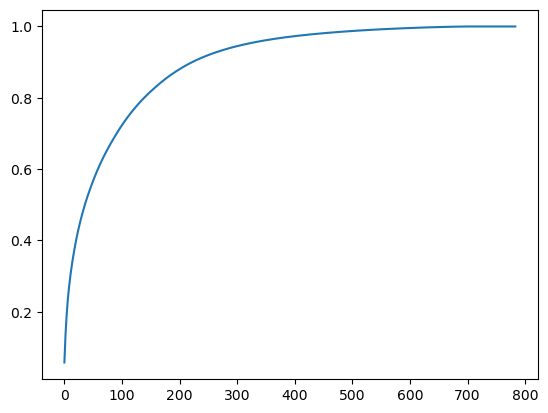

In [84]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))